In [2]:
#Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir('C:/Users/HP/Downloads/UAVDataset/UAV_Dataset/newdataset_1')
for dir in dirs:
    files = list(os.listdir('newdataset_1/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Aeroplane Folder has 2261 Images
Bird Folder has 451 Images
Drone Folder has 1071 Images
Helicopter Folder has 2435 Images
Malicious UAV Folder has 243 Images
Images Folder has 6461 Images


In [4]:
#Load Images into Arrays as Dataset
base_dir = 'C:/Users/HP/Downloads/UAVDataset/UAV_Dataset/newdataset_1'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 6461 files belonging to 5 classes.
Using 5169 files for training.
Found 6461 files belonging to 5 classes.
Using 1292 files for validation.


In [6]:
aerial_names = train_ds.class_names
aerial_names

['Aeroplane', 'Bird', 'Drone', 'Helicopter', 'Malicious UAV']

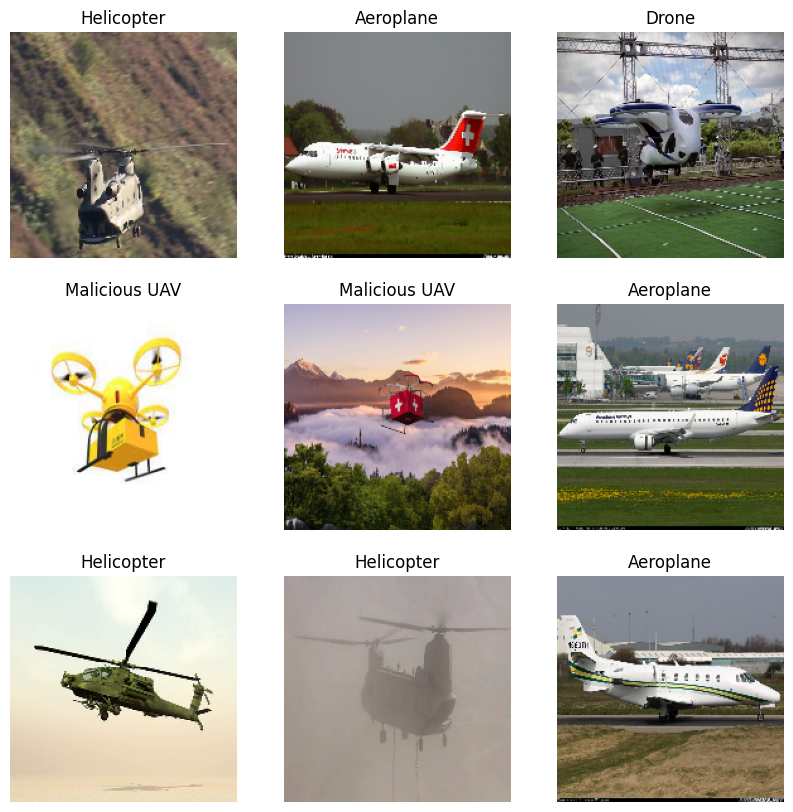

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(aerial_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [11]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\HP\Downloads\Stock file\fvenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [17]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
161/162 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5293 - loss: 1.2744  

C:\Users\HP\Downloads\Stock file\fvenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


162/162 ━━━━━━━━━━━━━━━━━━━━ 80s 492ms/step - accuracy: 0.5301 - loss: 1.2723 - val_accuracy: 0.7423 - val_loss: 0.7039
Epoch 2/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 66s 409ms/step - accuracy: 0.7697 - loss: 0.6062 - val_accuracy: 0.7786 - val_loss: 0.5828
Epoch 3/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 68s 420ms/step - accuracy: 0.7942 - loss: 0.5640 - val_accuracy: 0.7902 - val_loss: 0.5562
Epoch 4/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 75s 464ms/step - accuracy: 0.8193 - loss: 0.5004 - val_accuracy: 0.8119 - val_loss: 0.5079
Epoch 5/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 75s 465ms/step - accuracy: 0.8262 - loss: 0.4664 - val_accuracy: 0.8119 - val_loss: 0.5128
Epoch 6/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 76s 467ms/step - accuracy: 0.8338 - loss: 0.4581 - val_accuracy: 0.8204 - val_loss: 0.5095
Epoch 7/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 75s 460ms/step - accuracy: 0.8328 - loss: 0.4341 - val_accuracy: 0.8351 - val_loss: 0.4535
Epoch 8/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 76s 471ms/step - accuracy: 0.8501 - loss: 0.3898 - val

In [18]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + aerial_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [19]:
classify_images('C:/Users/HP\Downloads/UAVDataset/UAV_Dataset/newdataset_1/Malicious UAV/ima7.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


'The Image belongs to Malicious UAV with a score of 87.152824'

In [20]:
model.save('aerial_Recog_Model.h5')